In [ ]:
import os
from config import LR, NUM_EPOCHS, RANDOM_STATE, TEST_PATH, TRAIN_PATH
from data_and_preprocessors.data import load_data
from data_and_preprocessors.preprocessors import build_transformer_for_tree, build_transformer_for_regression

from classic_ml.evaluate_pipe import evaluate_models 
from classic_ml.pipelines import make_pipelines
from classic_ml.grid_search import search_best
from classic_ml.staking import build_and_fit_stacking

from mlp.mlp_model import MLPClassifier
from mlp.train_mlp import train_all_mlps
from mlp.mlp_prepare_data import mlp_prepare_data
from mlp.mlp_pipe import make_mlp_pipeline
from mlp.mlp_graph import plot_mlp_training_loss

from sklearn.model_selection import train_test_split



In [3]:
test_data, train_data, target_data, idx = load_data(TRAIN_PATH, TEST_PATH)

categorical_cols = test_data.select_dtypes(include=['object']).columns
numerical_cols = test_data.select_dtypes(exclude=['object']).columns.drop(['person_age', 'person_income'])

X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2, 
                                        random_state=RANDOM_STATE, stratify=target_data)

In [ ]:
pipelines = make_pipelines(numerical_cols.tolist(), categorical_cols.tolist(), random_state=RANDOM_STATE)
best_models = search_best(pipelines, X_train, y_train, random_state=RANDOM_STATE)
stack = build_and_fit_stacking(best_models['rf'], best_models['lgbm'], X_train, y_train, random_state=RANDOM_STATE)

print("\nClassic ML models evaluation:")
evaluate_models(best_models, X_test, y_test)
print("\nStacking evaluation:")
evaluate_models({'stacking': stack}, X_test, y_test)

In [5]:
train_loader, test_loader, weight, input_dim = mlp_prepare_data(X_train, X_test, y_train, y_test, numerical_cols, categorical_cols)
mlp_pipe = make_mlp_pipeline(input_dim)

Training model: large
Training model: medium
Training model: small
Training model: deep


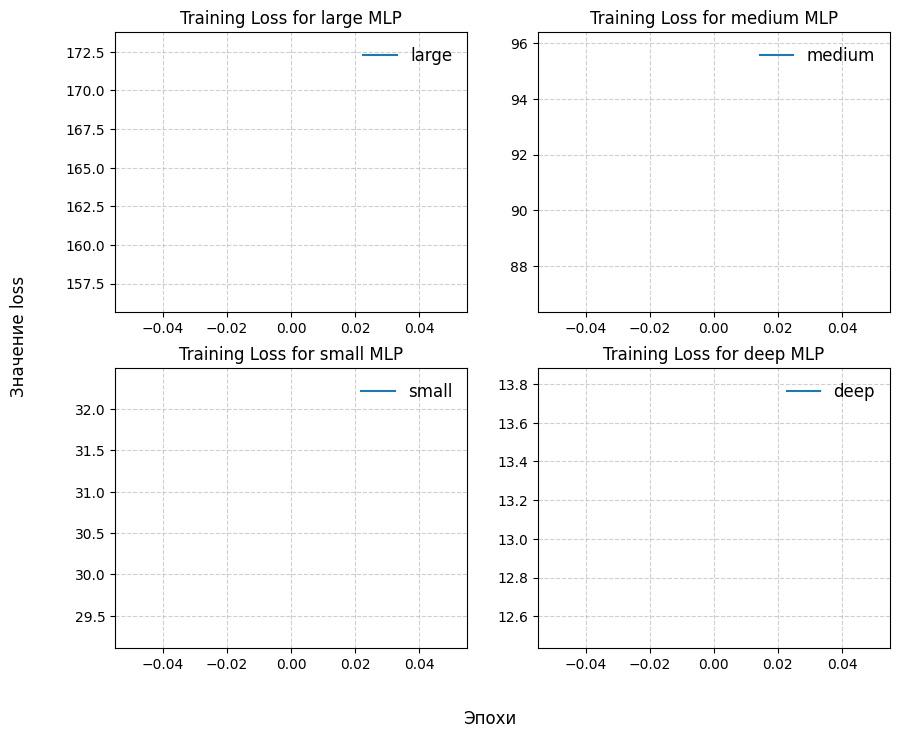

In [ ]:
train_loss = train_all_mlps(mlp_pipe, train_loader, weight, n_epochs=NUM_EPOCHS, lr=LR)
plot_mlp_training_loss(mlp_pipe, train_loss)